In [84]:
import numpy as np
import math as ma
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
x = sym.Symbol('x')

# methods for finding root of a function 


zeros (roots) of a function are the values of x for which f(x)=0 

let us define a function f(x)

In [85]:
def f(x):
    #f = x**3 - 6*x**2 + 11*x - 6
    f = (x**2 - 1)**2 
    return f

In [86]:
def g(x):
    g = sym.diff(f(x),x)
    return g


In [87]:
def h(x):
    h = sym.diff(g(x),x)
    return h


In [88]:
def minima(y):
    if g(x).evalf(subs={x: y}).round(6) == 0 :
    
        if h(x).evalf(subs={x : y}).round(6) > 0 :
            print(y, 'is a local minima of ',f(x))
        
        elif h(x).evalf(subs={x : y}).round(6) == 0 :
            print(y, 'is a saddle point of ',f(x))
    
        else : 
            print(f(x),'is differentiable at', y)
    else :
        print(f(x),'is not differentiable at', y)

minima(-1)


# plot for the fucntion f(x)

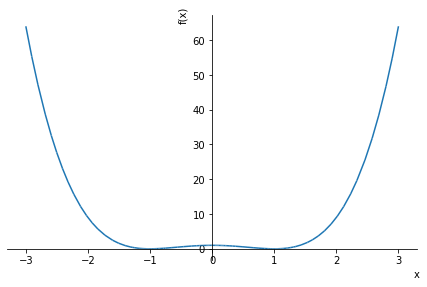

In [90]:
#sym.plot(f(x) , (x,-2,2) , ylim=(-3,3)  )
sym.plot(f(x),(x,-3,3))

# Stopping Criteria for iterative root finding method

Accept x = x1 as a root of f(x) = 0 if any one of the following criteria is satisfied:
    
    1. |f(x1)| ≤ ǫ (The functional value is less than or equal to the tolerance).
    
    2. |x0−x1|/|x1| ≤ ǫ (The relative change is less than or equal to the tolerance).
    
    3. The number of iterations 'k' is greater than or equal to a predetermined number, say N

Open methods begin with an initial guess of the root and then improving the guess iteratively.

Bracketing methods provide an absolute error estimate on the root's location and always work but converge slowly. 

In contrast, open methods do not always converge.

Let a and b be said to bracket a root since, by the intermediate value theorem, 

the continuous function f must have at least one root in the interval (a, b)

#  - Bisection Method 

Bisection is a bracket method because every interval brackets the root 

In [91]:
def bisection(a,b,sc):
    
    c = (a+b) / 2
    
    lists0 = [[round(a,4) , round(f(a),4) , round(b,4), round(f(b),4) , round(c,4) , round(f(c),4)] ]

    i=0
    while i < 20:
        if abs(f(c)) < sc:
            break
        else:
            if np.sign(f(c))==np.sign(f(a)):
                a=c
            else:
                b=c
        
            c=(a+b)/2
        lists0.append([round(a,4) , round(f(a),4) , round(b,4), round(f(b),4) , round(c,4) , round(f(c),4)] )
        i=i+1
    #print( "approx root is" , c )
    return lists0

if the function is continuous and f(a) and f(b) have opposite signs, then there is a root x = c of f(x) = 0 or 
in [a, b].

In [106]:
a=float(input("enter 1:"))
b=float(input("enter 2:"))
sc=0.0001

if np.sign(f(a))!= np.sign(f(b)) :
    cols0 = ['a' , 'f(a)' , 'b' , 'f(b)' , 'c' ,  'f(c)'  ]
    lists0 = bisection(a , b , sc)
    df0 = pd.DataFrame(lists0 , columns = cols0) 

    print(df0)
    print('the equation is ' , f(x))
    print("approx root is" , float(df0['c'][-1:]))
    print(f(a),'is f(a)')
    print(f(b),'is f(b)')
else : 
    print('give a & b in accordance with the given criteria')

        a    f(a)    b  f(b)       c    f(c)
0  0.0000  1.0000  1.0   0.0  0.5000  0.5625
1  0.5000  0.5625  1.0   0.0  0.7500  0.1914
2  0.7500  0.1914  1.0   0.0  0.8750  0.0549
3  0.8750  0.0549  1.0   0.0  0.9375  0.0147
4  0.9375  0.0147  1.0   0.0  0.9688  0.0038
5  0.9688  0.0038  1.0   0.0  0.9844  0.0010
6  0.9844  0.0010  1.0   0.0  0.9922  0.0002
7  0.9922  0.0002  1.0   0.0  0.9961  0.0001
the equation is  (x**2 - 1)**2
approx root is 0.9961
1.0 is f(a)
0.0 is f(b)


# - Secant Method

The secant method is z root-finding algorithm that uses a succession of roots of secant lines 
to better approximate a root of a function f.

The two initial guesses do not need to bracket the root of the equation.

It may not converge.

In [107]:
def secant1(a,b,sc) :
    if f(a)*f(b) < 0 :
        e = b -  ( ( f(b) * (b - a) )  / (f(b) - f(a))  )    #formula 
        lists1 = [[round(a,4) ,  round(f(a),4) ,  round(b,4) , round(f(b),4) , round(e,4) , round(f(e),4)] ]

    
        i=1
        while i < 20:
            if abs(f(e)) < sc:
                break
            else:
                a = b
                b = e
                
                e = b -  ( ( f(b) * (b - a) )  / ( f(b) - f(a))  )
            
            lists1.append ([round(a,4) ,  round(f(a),4), round(b,4) , round(f(b),4) , round(e,4) , round(f(e),4)])
            i=i+1
        return lists1
    else :
        print(None)

In [109]:
a =  float(input("enter a:")) 
b = float(input("enter b:")) 
sc = 0.00001

lists1 = secant1(a,b,sc)
cols1 = ['a' , 'f(a)' , 'b' , 'f(b)' , 'e' ,  'f(e)'  ]
df1 = pd.DataFrame(lists1 , columns = cols1)

if df1.empty == False :
     
    print(df1)
    
    print('')
    print('the equation is ' , f(x))        
    print("approx root is" , float(df1['e'][-1:])  )

else :
    print('f(a)*f(b) < 0 should be satisfied')


enter a:-2
enter b:0
None
f(a)*f(b) < 0 should be satisfied


as we can see in secant method , the 2 intial need not bracket the root

 # - Regular-Falsi Method

The secant method can easily be modified to make it a bracket method(i.e. it is convergent) . 
This yields a method called , Regular-Falsi .

Takes larger time span to calculate root



In [123]:
def regular_falsi(a , b, sc) : 

    e=( ( a*f(b) )-( f(a)*b )) / ( f(b)-f(a) )
    lists2 = [[round(a,4) ,  round(f(a),4) ,  round(b,4) , round(f(b),4) , round(e,4) , round(f(e),4)] ]


    i=1
    while i<50:
        if abs(f(e)) < sc:
            break
            
        else:
            if np.sign(f(e)) == np.sign(f(a)):
                a = e
            else:
                b = e
                
            e=((a*f(b))-(f(a)*b))/(f(b)-f(a))           
    
        lists2.append( [round(a,4) ,  round(f(a),4) ,  round(b,4) , round(f(b),4) , round(e,4) , round(f(e),4)] )
        i=i+1
    return lists2


In [124]:
a=float(input("enter 1:"))
b = float(input("enter 2:"))
sc=0.0001 #Stopping criteria 

lists2 = regular_falsi(a , b, sc)    
cols2 = ['a' , 'f(a)' , 'b' , 'f(b)' , 'e' ,  'f(e)'  ]  
df2 = pd.DataFrame(lists2 , columns = cols2) 

print(df2) 
print('')
print("approx root is" , float(df2.e[-1:].round()))
print("the equation is " , f(x))

enter 1:-1.5
enter 2:0.5
         a    f(a)    b    f(b)       e    f(e)
0  -1.5000  1.5625  0.5  0.5625  1.6250  2.6917
1   1.6250  2.6917  0.5  0.5625  0.2028  0.9194
2   0.2028  0.9194  0.5  0.5625  0.9684  0.0039
3   0.9684  0.0039  0.5  0.5625  0.9716  0.0031
4   0.9716  0.0031  0.5  0.5625  0.9743  0.0026
5   0.9743  0.0026  0.5  0.5625  0.9764  0.0022
6   0.9764  0.0022  0.5  0.5625  0.9783  0.0018
7   0.9783  0.0018  0.5  0.5625  0.9799  0.0016
8   0.9799  0.0016  0.5  0.5625  0.9812  0.0014
9   0.9812  0.0014  0.5  0.5625  0.9824  0.0012
10  0.9824  0.0012  0.5  0.5625  0.9835  0.0011
11  0.9835  0.0011  0.5  0.5625  0.9844  0.0010
12  0.9844  0.0010  0.5  0.5625  0.9852  0.0009
13  0.9852  0.0009  0.5  0.5625  0.9860  0.0008
14  0.9860  0.0008  0.5  0.5625  0.9866  0.0007
15  0.9866  0.0007  0.5  0.5625  0.9872  0.0006
16  0.9872  0.0006  0.5  0.5625  0.9878  0.0006
17  0.9878  0.0006  0.5  0.5625  0.9883  0.0005
18  0.9883  0.0005  0.5  0.5625  0.9888  0.0005
19  0.9888  0.0

# - Newton-Raphson Method
one-point iterative method

The initial approximation x0 can be computed by drawing a graph of 
f(x) or by running a far iteration of the bisection method and taking the approximate
value obtained by the bisection method as the initial approximation for Newton-Ralphson iteration.

Initial approximation x0  must be chosen carefully - if it is far from the root, the method will diverge.

If the derivation of f(x) is computable, then the Newton method is an excellent rootfinding mehtod.

If the derivative is not computable, use the secant method, instead.


In [128]:
def newton_raphson(x1 , sc):
    
    r = g(x).evalf(subs={x: x1})
    x2 = x1 - (f(x1) / r)
    lists3 = [ [round(x1,4) ,  round(f(x1),4), round(r,4) , round(x2,4) ] ]

    i=0
    while i < 15:
        if abs(f(x1)) < sc:
            break
        else:
            x1 = x2
            r = g(x).evalf(subs={x: x1})
            x2 = x1 - ( f(x1) / r )
            
        lists3.append([round(x1,4) ,  round(f(x1),4) , round(r,4) , round(x2,4) ])
        i=i+1
    return lists3

In [132]:
x1=float(input("enter 1:"))
sc = 0.00001 #Stopping criteria 
try : 
    lists3 = newton_raphson(x1 , sc)
except TypeError:
    print('intial starting point is not valid')
    
    

enter 1:0.6


In [133]:
cols3 = ['x' , 'f(x)' , "f'(x)" , 'x+1']
df3 = pd.DataFrame(lists3 , columns = cols3) 

print(df3)
print('')
print("approx root is",float(df3['x+1'][-1:]))
print("the equation is " , f(x))

        x    f(x)    f'(x)     x+1
0     0.6  0.4096  -1.5360  0.8667
1  0.8667  0.0619  -0.8628  0.9385
2  0.9385  0.0142  -0.4478  0.9702
3  0.9702  0.0034  -0.2276  0.9853
4  0.9853  0.0008  -0.1147  0.9927
5  0.9927  0.0002  -0.0575  0.9964
6  0.9964  0.0001  -0.0288  0.9982
7  0.9982     0.0  -0.0144  0.9991
8  0.9991     0.0  -0.0072  0.9995

approx root is 0.9994964599609375
the equation is  (x**2 - 1)**2


# - Chebyshev's Method

In [134]:
def chebyshev(x1 , sc):
    r=g(x).evalf(subs={x: x1})
    s=h(x).evalf(subs={x: x1})
    
    x2 = x1 - (f(x1)/r) + (f(x1)**2 * s / 2*r**3)
    
    lists4 = [ [round(x1,4) ,  round(f(x1),4), round(r,4), round(s,4) , round(x2,4) ] ]
    
    i=0
    while i < 15:
        if abs(f(x1)) < sc:
            break
        
        else:

            if round(x2,6)==1:
                break
    
            else:

                x1 = x2
                
                r=g(x).evalf(subs={x: x1})
                
                
                s=h(x).evalf(subs={x: x1})
                
                x2 = x1 - ( f(x1)/ r ) + (( (f(x1)**2)  *  s ) / (r**3) ) # s is f'(x) & r is f''x() 
        lists4.append ([round(x1,4) ,  round(f(x1),4), round(r,4), round(s,4) , round(x2,4) ])        
        i=i+1
    return lists4


In [135]:
x1 = float(input("enter 1:"))
sc = 0.0001
try : 
    lists4 = chebyshev(x1 , sc)
    cols4 = ['x' , 'f(x)' , "f'(x)" , "f''(x)"  , 'x+1']
    df4 = pd.DataFrame(lists4 , columns = cols4)
    print(df4)
    print('')
    print("approx root is",float(df4['x+1'][-1:]))
    print("the equation is " , f(x))
except TypeError:
    print('intial starting point is not valid')

enter 1:0.5
         x    f(x)    f'(x)             f''(x)     x+1
0      0.5  0.5625  -1.5000  -1.00000000000000  1.4089
1   1.4089  0.9704   5.5518            19.8212  1.3432
2   1.3432  0.6468   4.3211            17.6510  1.2851
3   1.2851  0.4243   3.3483            15.8166  1.2342
4   1.2342  0.2738   2.5831            14.2789  1.1903
5   1.1903  0.1737   1.9846            13.0019  1.1530
6   1.1530  0.1085   1.5189            11.9521  1.1217
7   1.1217  0.0667   1.1584            11.0982  1.0959
8   1.0959  0.0404   0.8808            10.4111  1.0749
9   1.0749  0.0241   0.6679             9.8641  1.0580
10  1.0580  0.0143   0.5053             9.4328  1.0447
11  1.0447  0.0083   0.3816             9.0958  1.0342
12  1.0342  0.0048   0.2877             8.8346  1.0261
13  1.0261  0.0028   0.2167             8.6336  1.0198
14  1.0198  0.0016   0.1630             8.4796  1.0150
15  1.0150  0.0009   0.1226             8.3623  1.0113

approx root is 1.0112991333007812
the equation is  (

# lets plot the various iteration methods

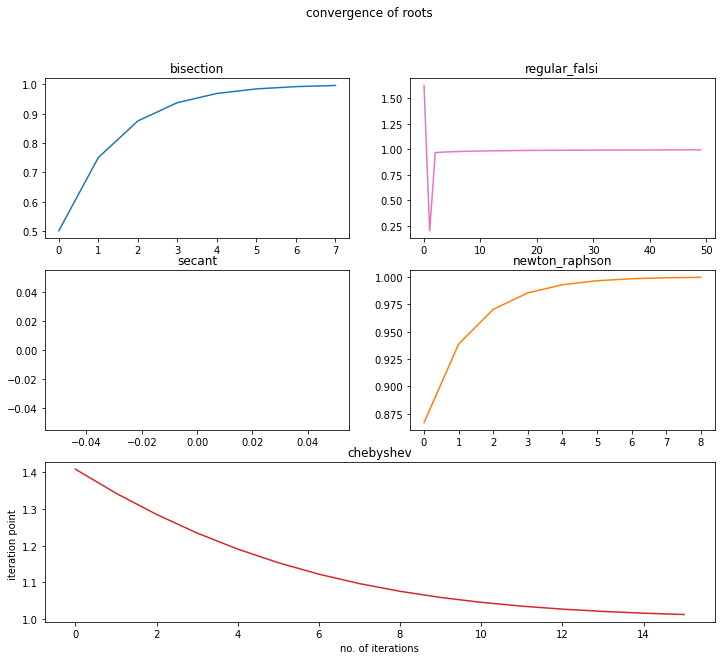

In [136]:
plt.figure(figsize=(12,10))
plt.suptitle('convergence of roots')



ax = [plt.subplot2grid((3, 2), (0 , 0), colspan = 1),
      plt.subplot2grid((3, 2), (0 , 1), colspan = 1),
      plt.subplot2grid((3, 2), (1 , 0), colspan = 1),
      plt.subplot2grid((3, 2), (1 , 1), colspan = 1),
      plt.subplot2grid((3, 2), (2 , 0), colspan = 2),]


ax[0].plot(df0.c)
ax[0].set_title('bisection')

ax[1].plot(df2.e,'tab:pink')
ax[1].set_title('regular_falsi')

ax[2].plot(df1.e,'tab:green')
ax[2].set_title('secant')



ax[3].plot(df3['x+1'],'tab:orange')
ax[3].set_title('newton_raphson')

ax[4].plot(df4['x+1'] , 'tab:red')
ax[4].set_title('chebyshev',)

plt.ylabel('iteration point ')
plt.xlabel('no. of iterations')
plt.show()

In [137]:
#fig , ax = plt.subplots(3,3)
#fig.suptitle('convergence of roots')
#fig.set_figheight(10)
#fig.set_figwidth(10)
#ax[0,0].plot(df3['x+1'],'tab:orange')
#ax[0,0].set_title('newton_raphson')
#ax[0,1].plot(df2.e,'tab:pink')
#ax[0,1].set_title('regular_falsi')
#ax[1,0].plot(df1.e,'tab:green')
#ax[1,0].set_title('secant')
#ax[1,1].plot(df0.c)
#ax[1,1].set_title('bisection')

#plt.show()

##### 